# Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [4]:
path = "C:/Users/Bertha/Documents/SJSU/5_Spring2024/DATA_240-Data_Mining_Analytics/DATA240_Project/DATA240/data/Supply_Chain_Shipment_Pricing_Dataset_20240302.csv"
data = pd.read_csv(path, index_col="id")

In [5]:
data

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
id,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04


# Data Cleaning

In [6]:
newcols = [i.strip().replace(" ","_").replace("#","num").replace("/","_").replace("(","").replace(")","") for i in data.columns]
data.columns = newcols

In [7]:
data.shape

(10324, 32)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10324 entries, 1 to 86823
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   project_code                  10324 non-null  object 
 1   pq_num                        10324 non-null  object 
 2   po___so_num                   10324 non-null  object 
 3   asn_dn_num                    10324 non-null  object 
 4   country                       10324 non-null  object 
 5   managed_by                    10324 non-null  object 
 6   fulfill_via                   10324 non-null  object 
 7   vendor_inco_term              10324 non-null  object 
 8   shipment_mode                 9964 non-null   object 
 9   pq_first_sent_to_client_date  10324 non-null  object 
 10  po_sent_to_vendor_date        10324 non-null  object 
 11  scheduled_delivery_date       10324 non-null  object 
 12  delivered_to_client_date      10324 non-null  object 
 13  delive

In [9]:
data.head()

,project_code,pq_num,po___so_num,asn_dn_num,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,...,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,line_item_insurance_usd
id,,,,,,,,,,,,,,,,,,,,,
1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


# Convert data types

## Explain why `po_sent_to_vendor_date`  and `pq_first_sent_to_client_date` has missing data values

PQ is the price quote, defined as a document that lists an approximately fixed price of goods. It's an informal statement between the buyer and supplier that states an approximate cost of the goods or services in the exchange. In this case, a quote or approximate cost for a bulk of pharmaceutical product to be exchanged between the suppliers (vendor column) and the buyers ()

On the other hand, the PO is the purchase order that is an official document that lists the exact prices and details of the purchase. It's a legal document the buyer uses to send to the supplier when making an order, listing the item, description, unit price, total price, quantity, etc. 


Sometimes the date the price quote was exchanged between the vendor and buyer was not captured, likely due to lack of communication via email, phone, etc. Many of these exchanges between the supplier sales person and a buyer may be exchanged verbally so an informal document listing the price may not always be captured, which makes sense in the world

Actually it's a common problem for sales representatives as they spend a lot of their time manually inputting or transferring data, leading to inconsistent document formatting, according to https://www.crmbuyer.com/story/how-sales-reps-can-solve-3-nagging-document-problems-86134.html. 

Customer Relationship Management (CRM) Tools are used to input customer and sales data to help businesspeople track communication and information relating to their sales. Although the purpose of a CRM is to make it easier and more efficient in dealing with multiple customers and leads/deals at the same time, in reality sales people end up with the bulk of the manual work for these CRM Tools. Instead of talking to prospectual customers, they spend a bulk of their time trying to keep all their information up-to-date, which is a big problem tradition CRM systems still have and impact sales representatives.

In [10]:
data['po_sent_to_vendor_date'] = data['po_sent_to_vendor_date'].replace(['Date Not Captured', 'N/A - From RDC'],np.nan)
data['pq_first_sent_to_client_date'] = data['po_sent_to_vendor_date'].replace(['Date Not Captured', 'Pre-PQ Process'],np.nan)

In [11]:
date_cols = ['po_sent_to_vendor_date',
 'scheduled_delivery_date',
 'delivered_to_client_date',
 'delivery_recorded_date',
 'pq_first_sent_to_client_date'
 ]
display(data[date_cols])
for d in date_cols:
    print(d)
    data[d] = pd.to_datetime(data[d])

,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,pq_first_sent_to_client_date
id,,,,,
1,NaN,2-Jun-06,2-Jun-06,2-Jun-06,NaN
3,NaN,14-Nov-06,14-Nov-06,14-Nov-06,NaN
4,NaN,27-Aug-06,27-Aug-06,27-Aug-06,NaN
15,NaN,1-Sep-06,1-Sep-06,1-Sep-06,NaN
16,NaN,11-Aug-06,11-Aug-06,11-Aug-06,NaN
...,...,...,...,...,...
86818,NaN,31-Jul-15,15-Jul-15,20-Jul-15,NaN
86819,NaN,31-Jul-15,6-Aug-15,7-Aug-15,NaN
86821,NaN,31-Aug-15,25-Aug-15,3-Sep-15,NaN


po_sent_to_vendor_date
scheduled_delivery_date


C:\Users\Bertha\AppData\Local\Temp\ipykernel_15176\2910687795.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[d] = pd.to_datetime(data[d])


delivered_to_client_date


C:\Users\Bertha\AppData\Local\Temp\ipykernel_15176\2910687795.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[d] = pd.to_datetime(data[d])


delivery_recorded_date


C:\Users\Bertha\AppData\Local\Temp\ipykernel_15176\2910687795.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[d] = pd.to_datetime(data[d])


pq_first_sent_to_client_date


In [12]:
data[date_cols].isnull().sum()

po_sent_to_vendor_date          5732
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
pq_first_sent_to_client_date    5732
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10324 entries, 1 to 86823
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   project_code                  10324 non-null  object        
 1   pq_num                        10324 non-null  object        
 2   po___so_num                   10324 non-null  object        
 3   asn_dn_num                    10324 non-null  object        
 4   country                       10324 non-null  object        
 5   managed_by                    10324 non-null  object        
 6   fulfill_via                   10324 non-null  object        
 7   vendor_inco_term              10324 non-null  object        
 8   shipment_mode                 9964 non-null   object        
 9   pq_first_sent_to_client_date  4592 non-null   datetime64[ns]
 10  po_sent_to_vendor_date        4592 non-null   datetime64[ns]
 11  scheduled_delivery_date       103

In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
pq_first_sent_to_client_date,4592,2012-01-25 07:21:13.170731520,2006-04-19 00:00:00,2010-02-04 00:00:00,2012-06-07 00:00:00,2014-04-30 00:00:00,2015-08-24 00:00:00,NaN
po_sent_to_vendor_date,4592,2012-01-25 07:21:13.170731520,2006-04-19 00:00:00,2010-02-04 00:00:00,2012-06-07 00:00:00,2014-04-30 00:00:00,2015-08-24 00:00:00,NaN
scheduled_delivery_date,10324,2011-10-04 15:30:28.593568256,2006-05-02 00:00:00,2009-09-08 00:00:00,2011-12-05 00:00:00,2013-12-23 00:00:00,2015-12-31 00:00:00,NaN
delivered_to_client_date,10324,2011-09-28 14:56:34.963192832,2006-05-02 00:00:00,2009-09-01 00:00:00,2011-11-25 00:00:00,2013-12-23 00:00:00,2015-09-14 00:00:00,NaN
delivery_recorded_date,10324,2011-10-01 12:33:28.523827968,2006-05-02 00:00:00,2009-09-01 00:00:00,2011-11-25 00:00:00,2014-01-13 00:00:00,2015-09-14 00:00:00,NaN
unit_of_measure_per_pack,10324.0,77.990895,1.0,30.0,60.0,90.0,1000.0,76.579764
line_item_quantity,10324.0,18332.53487,1.0,408.0,3000.0,17039.75,619999.0,40035.302961
line_item_value,10324.0,157650.567347,0.0,4314.5925,30471.465,166447.14,5951990.4,345292.066979
pack_price,10324.0,21.910241,0.0,4.12,9.3,23.5925,1345.64,45.609223
unit_price,10324.0,0.611701,0.0,0.08,0.16,0.47,238.65,3.275808


<Axes: ylabel='id'>

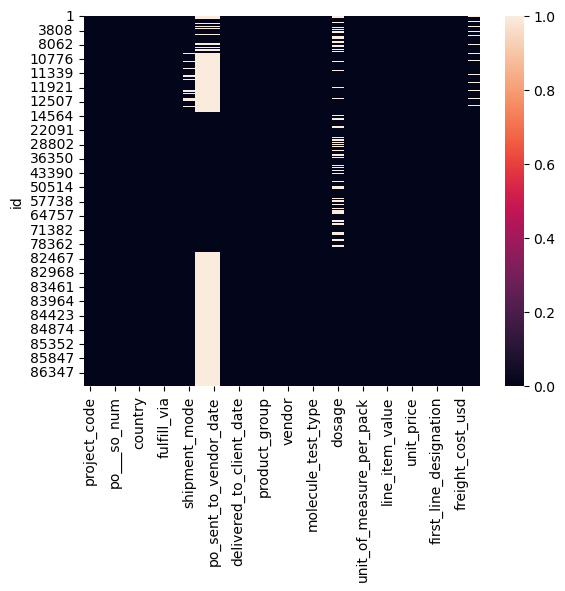

In [17]:
sns.heatmap(data.isnull())

In [18]:
data.describe(include=object).T

,count,unique,top,freq
project_code,10324,142,116-ZA-T30,768
pq_num,10324,1237,Pre-PQ Process,2681
po___so_num,10324,6233,SCMS-199289,67
asn_dn_num,10324,7030,ASN-19166,54
country,10324,43,South Africa,1406
managed_by,10324,4,PMO - US,10265
fulfill_via,10324,2,From RDC,5404
vendor_inco_term,10324,8,N/A - From RDC,5404
shipment_mode,9964,4,Air,6113
product_group,10324,5,ARV,8550


Followed following EDA tutorial on Kaggle https://www.kaggle.com/code/sumeet07/shipping-price-prediction-eda